# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to Preview the Grading for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find at least two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of economic activity or measures (see below) for the region of Brasília, Federal District, Brazil, or Brazil more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare Brasília, Federal District, Brazil to Ann Arbor, USA. In that case at least one source file must be about Brasília, Federal District, Brazil.

You are welcome to choose datasets at your discretion, but keep in mind they will be shared with your peers, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

State the region and the domain category that your data sets are about (e.g., Brasília, Federal District, Brazil and economic activity or measures).
You must state a question about the domain category and region that you identified as being interesting.
You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.
What do we mean by economic activity or measures? For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

Tips
Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
Several international agencies, such as the United Nations, the World Bank, the Global Open Data Index are other great places to look for data.
This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!
Example
Looking for an example? Here's what our course assistant put together for the Ann Arbor, MI, USA area using sports and athletics as the topic. Example Solution File

Total Market Values of teams - https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2017

Teams income - https://pt.wikipedia.org/wiki/Lista_de_faturamento_dos_clubes_de_futebol_brasileiro

Paraná income - https://globoesporte.globo.com/blogs/blog-do-rodrigo-capelo/post/2019/08/07/as-financas-do-parana-em-2018-com-pouca-receita-e-muita-divida-nao-havia-como-concorrer-na-elite.ghtml

América Mineiro income - https://globoesporte.globo.com/blogs/blog-do-rodrigo-capelo/post/2019/08/07/as-financas-do-america-mg-em-2018-o-coelho-precisa-de-uma-solucao-nova-para-a-instabilidade.ghtml

Atlético Paranaense - https://www.bandab.com.br/esporte/times/athletico/athletico-divulga-balanco-de-2018-com-superavit-e-receita-de-r-1415-milhoes/

In [33]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [34]:
arquivo_valor = "/Users/joaopaulo/Downloads/team_value_2018.xlsx"
arquivo_faturmento = "/Users/joaopaulo/Downloads/faturamento_clubes_2018.xlsx"
arquivo_pontos = "/Users/joaopaulo/Downloads/Campeonato_Brasileiro_2018.csv"

In [35]:
# Read in 2018 teams value
valor = pd.read_excel(arquivo_valor, skiprows=1, usecols=[0,4], names=["Clube", "Valor"],)# skipfooter=2)
valor["Valor"] = valor["Valor"].apply(lambda x: x.replace(x, x[:-8])).str.replace(",", ".").astype(float)
valor["Valor"] *= 4.42 # Valor do Euro em 15/12/2018
valor.columns = ["Clube", "Valor (M R$)"]

times_dict = {'Sociedade Esportiva Palmeiras':"Palmeiras",
 'Clube de Regatas do Flamengo':"Flamengo",
 'Grêmio Foot-Ball Porto Alegrense\xa0': "Grêmio",
 'São Paulo Futebol Clube':"São Paulo",
 'Sport Club Corinthians Paulista\xa0': "Corinthians",
 'Sport Club Internacional\xa0\xa0':"Internacional",
 'Santos FC': "Santos",
 'Fluminense Football Club': "Fluminense",
 'Clube Atlético Mineiro':"Atlético Mineiro",
 'Cruzeiro Esporte Clube\xa0': "Cruzeiro",
 'Club Athletico Paranaense': "Atlético Paranaense",
 'Club de Regatas Vasco da Gama': "Vasco da Gama",
 'Esporte Clube Bahia': "Bahia",
 'Botafogo Rio de Janeiro': "Botafogo",
 'Associação Chapecoense de Futebol': "Chapecoense",
 'Fortaleza Esporte Clube': "Fortaleza",
 'Goiás Esporte Clube': "Goiás",
 'Ceará Sporting Club\xa0\xa0': "Ceará", 
 "Paraná Clube\xa0\xa0": "Paraná", 
 "América Futebol Clube (MG)\xa0\xa0": "América Mineiro", 
 "Sport Club do Recife\xa0\xa0": "Sport", 
 "Esporte Clube Vitória": "Vitória"}

valor['Clube'] = valor["Clube"].replace(times_dict)


In [36]:
# Read in 2018 teams income
faturamento = pd.read_excel(arquivo_faturmento, usecols=[1,3])
faturamento["Faturamento"] = faturamento["Faturamento"].apply(lambda x: x.replace(x, x[4:-11])).str.replace(",", ".").astype(float)
faturamento.columns = ["Clube", "Faturamento (M R$)"]

fatura_dict={"Vasco":"Vasco da Gama",
  "Athletico Paranaense": "Atlético Paranaense"}

faturamento["Clube"].replace("Vasco", "Vasco da Gama", inplace = True)

faturamento = faturamento.append({"Clube": "América Mineiro", "Faturamento (M R$)": 56.0 }, ignore_index=True,)
faturamento = faturamento.append({"Clube": "Paraná", "Faturamento (M R$)": 49.0 }, ignore_index=True,)
faturamento = faturamento.append({"Clube": "Atlético Paranaense", "Faturamento (M R$)": 141.5 }, ignore_index=True,)

In [37]:
# Read in 2018 final points info
pontos = pd.read_csv(arquivo_pontos, usecols=[1,2])
pontos["Equipes"].replace("Sport[nota 4]", "Sport", inplace=True)

In [38]:
# Merge all info into a DataFrame containg points, income and value of the squad
tabela = pontos.merge(faturamento, left_on='Equipes', right_on='Clube', how="left")
tabela = tabela.merge(valor, left_on='Equipes', right_on='Clube', how="left")
tabela.drop(axis=1, columns=["Clube_x", "Clube_y"], inplace=True)

In [39]:
# Average cost of a single point in the competition
valor_por_ponto = tabela["Valor (M R$)"].sum()/tabela["P"].sum()

<IPython.core.display.Javascript object>


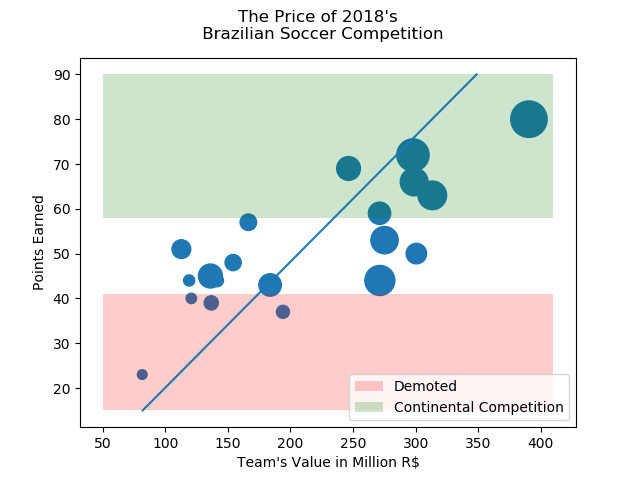

In [40]:
fig, ax = plt.subplots()

graph = plt.scatter(tabela["Valor (M R$)"], tabela["P"], s=tabela["Faturamento (M R$)"], picker=5);
avg_point = plt.plot([valor_por_ponto*20,valor_por_ponto*85], [15,90],);

red = plt.gca().fill_between([50,410], [41,41], [15,15], facecolor='red', alpha = 0.2);
blue = plt.gca().fill_between([50,410], [90,90], [58,58], facecolor='green', alpha = 0.2);

plt.xlabel("Team's Value in Million R$");
plt.ylabel('Points Earned');
fig.suptitle("The Price of 2018's \n Brazilian Soccer Competition");
plt.legend(handles=[red, blue,], labels=["Demoted", "Continental Competition",], loc="lower right");